# **Angular correlation between quark-antiquark pairs**

Read data from files and compute the angle between the quark and antiquark pair.

In [1]:
import numpy as np
import os
import pickle

current_path = os.getcwd() 
quark = 'charm'
tau_s = 0.4
fonll = False

if fonll:
    data_tau = pickle.load(open(current_path + '/results/pb+pb_5020gev_su2_fonll_' + quark  + '/ev_1_q_1_n_1.pickle', "rb"))
    tau = np.array(data_tau['xmu'])[:, 0]
    index_tau_s = min(range(len(tau)), key=lambda i: abs(tau[i]-tau_s))

    p = pickle.load(open(current_path + '/results/pb+pb_5020gev_su2_fonll_' + quark  + '/parameters.pickle', "rb"))
    events = p['NEVENTS']

    angles = {}
    pTs_qs = {}
    i = 0
    folder = 'pb+pb_5020gev_su2_fonll_' + quark
    directory = current_path + '/results/' + folder + '/'

    angles_pT = []
    pTs_q, pTs_aq = [], []

    for ev in range(1, events+1):
        pt, N = p['PTFONLL'], p['NFONLL']
        for ipt in range(len(pt)):
            for ip in range(N[ipt]):
                file_name_q = 'ev_' + str(ev) + '_q_' + str(ipt+1) + '_n_' + str(ip+1) + '.pickle'
                file_path_q = directory + file_name_q
                data_q = pickle.load(open(file_path_q, "rb"))
                index_q = index_tau_s
                pT_q = [np.array(data_q['pmu'])[index_q, 1], np.array(data_q['pmu'])[index_q, 2]]
                pTs_q.append(np.sqrt(pT_q[0]**2+pT_q[1]**2))

                file_name_aq = 'ev_' + str(ev) + '_aq_' + str(ipt+1) + '_n_' + str(ip+1) + '.pickle'
                file_path_aq = directory + file_name_aq
                data_aq = pickle.load(open(file_path_aq, "rb"))
                index_aq = index_tau_s
                pT_aq = [np.array(data_aq['pmu'])[index_aq, 1], np.array(data_aq['pmu'])[index_aq, 2]]

                unit_vector_pT_q = pT_q / np.linalg.norm(pT_q)
                unit_vector_pT_aq = pT_aq / np.linalg.norm(pT_aq)
                dot_product = np.dot(unit_vector_pT_q, unit_vector_pT_aq)
                angle = np.arccos(dot_product) * 180 / np.pi
                angles_pT.append(angle)

        angles['fonll'] = angles_pT
        pTs_qs['fonll'] = pTs_q
        i=i+1

    os.chdir(current_path + '/results/')
    filename = 'angles_fonll_' + quark + '_tau_' + str(tau_s) + '.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(angles, handle)
    filename_pTs = 'pT_quarks_fonll_' + quark + '_tau_' + str(tau_s) + '.pickle'
    with open(filename_pTs, 'wb') as handle:
        pickle.dump(pTs_qs, handle)
else:
    pTs = [0.5, 5.0, 10.0]
    events = 20

    data_tau = pickle.load(open(current_path + '/results/pb+pb_5020gev_su2_pT_0.5_' + quark + '/ev_1_q_1_tp_1.pickle', "rb"))
    tau = np.array(data_tau['xmu'])[:, 0]
    index_tau_s = min(range(len(tau)), key=lambda i: abs(tau[i]-tau_s))

    p = pickle.load(open(current_path + '/results/pb+pb_5020gev_su2_pT_0.5_' + quark + '/parameters.pickle', "rb"))
    ntp, nq = p['NTP'], p['NQ']

    angles = {}
    pTs_qs = {}
    i = 0
    for pT in pTs:
        folder = 'pb+pb_5020gev_su2_pT_' + str(pT) + '_' + quark
        directory = current_path + '/results/' + folder + '/'

        angles_pT = []
        pTs_q, pTs_aq = [], []

        for ev in range(1, events+1):
            for tp in range(1, ntp+1):
                for q in range(1, nq+1):
                    file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.pickle'
                    file_path_q = directory + file_name_q
                    data_q = pickle.load(open(file_path_q, "rb"))
                    index_q = index_tau_s
                    pT_q = [np.array(data_q['pmu'])[index_q, 1], np.array(data_q['pmu'])[index_q, 2]]
                    pTs_q.append(np.sqrt(pT_q[0]**2+pT_q[1]**2))

                    file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.pickle'
                    file_path_aq = directory + file_name_aq
                    data_aq = pickle.load(open(file_path_aq, "rb"))
                    index_aq = index_tau_s
                    pT_aq = [np.array(data_aq['pmu'])[index_aq, 1], np.array(data_aq['pmu'])[index_aq, 2]]

                    unit_vector_pT_q = pT_q / np.linalg.norm(pT_q)
                    unit_vector_pT_aq = pT_aq / np.linalg.norm(pT_aq)
                    dot_product = np.dot(unit_vector_pT_q, unit_vector_pT_aq)
                    angle = np.arccos(dot_product) * 180 / np.pi
                    angles_pT.append(angle)

        angles[str(pT)] = angles_pT
        pTs_qs[str(pT)] = pTs_q
        i=i+1

    os.chdir(current_path + '/results/')
    filename_angles = 'angles_' + quark + '_tau_' + str(tau_s) + '.pickle'
    with open(filename_angles, 'wb') as handle:
        pickle.dump(angles, handle)
    filename_pTs = 'pT_quarks_' + quark + '_tau_' + str(tau_s) + '.pickle'
    with open(filename_pTs, 'wb') as handle:
        pickle.dump(pTs_qs, handle)

Plot the results.

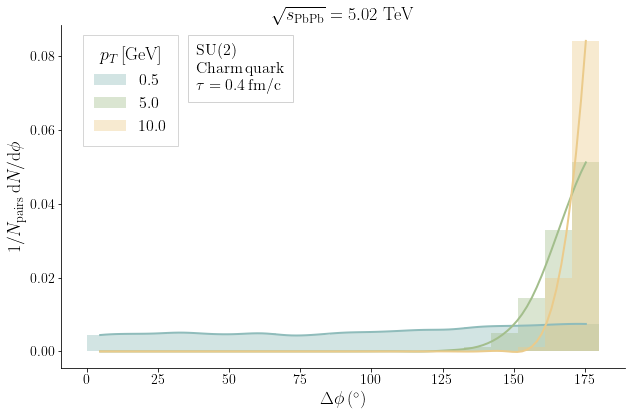

In [2]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams.update({'font.size':14})

fig = plt.figure()
ax = plt.subplot()
plt.title(r'$\sqrt{s_\mathrm{PbPb}}=5.02\,\,\mathrm{TeV}$', size = 18)
plt.ylabel(r'$1/N_\mathrm{pairs}\,\mathrm{d}N/\mathrm{d}\phi$', size = 18)
plt.xlabel(r'$\Delta\phi\,(^\circ)$', size = 18)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

nbins = [20, 20, 20]
nbins_interp = 100
phi_low, phi_high = 0, 180

colors = ['#8FBCBB', '#A3BE8C', '#EBCB8B']
pTs = [0.5, 5.0, 10.0]
labels = [r'$0.5$', r'$5.0$', r'$10.0$']

angles = pickle.load(open('angles_' + quark + '_tau_' + str(tau_s) + '.pickle', "rb"))

i=0
for pT in pTs:
    n, bins, _ = plt.hist(angles[str(pT)], bins=np.linspace(phi_low, phi_high, nbins[i]), density=True, alpha=0.4, color=colors[i], label=labels[i])  
    bin_centers = 0.5*(bins[1:]+bins[:-1])

    bin_interp = np.linspace(bin_centers[0], bin_centers[len(bin_centers)-1], nbins_interp)
    cubic_interp = interp1d(bin_centers, n, kind='cubic')
    cubic_results = cubic_interp(bin_interp)
    plt.plot(bin_interp, cubic_results, color=colors[i], linewidth = 2.0)
    i=i+1

leg = ax.legend(fontsize = 16, loc = 'upper left', bbox_to_anchor=(0.033,0.98))
leg.get_frame().set_boxstyle('square')
leg.set_title(r'$p_T\,\mathrm{[GeV]}$',prop={'size':18})

textstr = '\n'.join((
        r'${\huge\mathrm{SU(2)}}$',
        r'$\mathrm{Charm\,quark}$',
        r'$\tau=0.4\,\mathrm{fm/c}$',
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.7, edgecolor='silver', pad=0.5)
ax.text(0.24, 0.948, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)

plt.tight_layout()

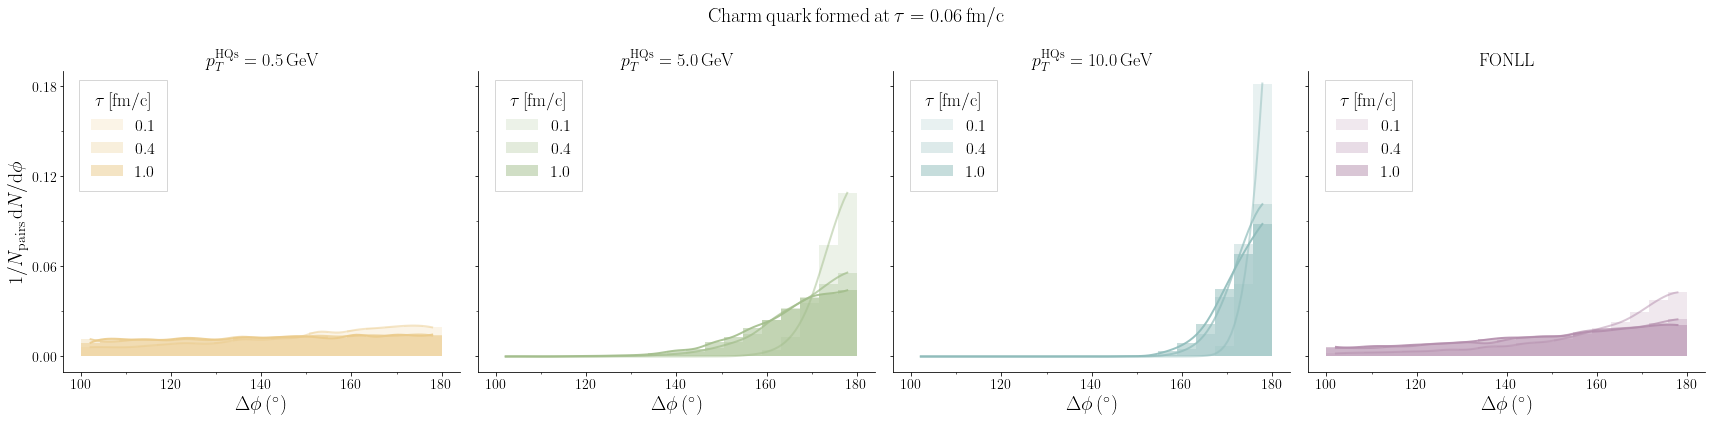

In [6]:
from matplotlib.ticker import MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (24, 6)
plt.rcParams.update({'font.size':14})

fig = plt.figure(constrained_layout=True)
if quark=='charm':
    fig.suptitle(r'$\mathrm{Charm\,quark\,formed\,at\,}\tau=0.06\,\mathrm{fm/c}$', size = 20)
elif quark=='beauty':
    fig.suptitle(r'$\mathrm{Beauty\,quark\,formed\,at\,}\tau=0.02\,\mathrm{fm/c}$', size = 20)

gs = fig.add_gridspec(1, 4, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].set_ylabel(r'$1/N_\mathrm{pairs}\,\mathrm{d}N/\mathrm{d}\phi$', size = 20)

for i in range(4):
    axs[i].xaxis.set_major_locator(MultipleLocator(20))
    axs[i].xaxis.set_minor_locator(MultipleLocator(10))
    axs[i].yaxis.set_major_locator(MultipleLocator(0.06))
    axs[i].yaxis.set_minor_locator(MultipleLocator(0.03))
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].set_xlabel(r'$\Delta\phi\,(^\circ)$', size = 20)
    axs[i].set_ylim(-0.01, 0.19)

nbins_interp = 100
phi_low, phi_high = 100, 180

tau_stops  = [0.1, 0.4, 1.0]
pTs = [0.5, 5.0, 10.0]
colors = ['#EBCB8B', '#A3BE8C', '#8FBCBB']
labels = [r'$0.1$', r'$0.4$', r'$1.0$']
alphas = [0.2, 0.3, 0.5]
alphas_lines = [0.5, 0.7, 0.9]
titles = [r'$p_T^{\mathrm{HQs}}=0.5\,\mathrm{GeV}$', r'$p_T^{\mathrm{HQs}}=5.0\,\mathrm{GeV}$', r'$p_T^{\mathrm{HQs}}=10.0\,\mathrm{GeV}$', r'$\mathrm{FONLL}$']

i = 0
for tau_stop in tau_stops:
    ipt = 0
    for pT in pTs:
        angles = pickle.load(open('angles_' + quark + '_tau_' + str(tau_stop) + '.pickle', "rb"))
        nbins = [20, 20, 20]

        n, bins, _ = axs[ipt].hist(angles[str(pT)], bins=np.linspace(phi_low, phi_high, nbins[ipt]), density=True, alpha=alphas[i], color=colors[ipt], label=labels[i])  
        bin_centers = 0.5*(bins[1:]+bins[:-1])

        bin_interp = np.linspace(bin_centers[0], bin_centers[len(bin_centers)-1], nbins_interp)
        cubic_interp = interp1d(bin_centers, n, kind='cubic')
        cubic_results = cubic_interp(bin_interp)
        axs[ipt].plot(bin_interp, cubic_results, color=colors[ipt], linewidth = 2.0, alpha=alphas_lines[i])

        leg = axs[ipt].legend(fontsize = 16, loc = 'upper left', bbox_to_anchor=(0.033,0.98))
        leg.get_frame().set_boxstyle('square')
        leg.set_title(r'$\tau\,\mathrm{[fm/c]}$',prop={'size':18})

        axs[ipt].set_title(titles[ipt], size = 18)

        ipt=ipt+1

    nbins = 20
    angles = pickle.load(open('angles_fonll_' + quark + '_tau_' + str(tau_stop) + '.pickle', "rb"))
    n, bins, _ = axs[3].hist(angles['fonll'], bins=np.linspace(phi_low, phi_high, nbins), density=True, alpha=alphas[i], color='#B48EAD', label=labels[i])  
    bin_centers = 0.5*(bins[1:]+bins[:-1])

    bin_interp = np.linspace(bin_centers[0], bin_centers[len(bin_centers)-1], nbins_interp)
    cubic_interp = interp1d(bin_centers, n, kind='cubic')
    cubic_results = cubic_interp(bin_interp)
    axs[3].plot(bin_interp, cubic_results, color='#B48EAD', linewidth = 2.0, alpha=alphas_lines[i])

    leg = axs[3].legend(fontsize = 16, loc = 'upper left', bbox_to_anchor=(0.033,0.98))
    leg.get_frame().set_boxstyle('square')
    leg.set_title(r'$\tau\,\mathrm{[fm/c]}$',prop={'size':18})

    axs[3].set_title(titles[3], size = 18)

    i=i+1

plt.tight_layout()
